# 생선 클래스의 확률 예측 프로그램

- 다중분류(클래스 7개)
- 5가지 특성 사용(무게, 길이, 대각선, 신장, 두께)

상황 : 랜덤박스 '럭키백'에 박스 안 생선에 대해 7개의 클래스들의 확률 표기하여 판매

**csv 데이터 불러오기**

In [ ]:
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
#고윳값 확인(종류 확인)
print(pd.unique(fish['Species'])) #클래스 총 7개

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


**데이터 프레임에서 input과 target 나누기**

하나의 열 선택 -> 원하는 열을 딕셔너리처럼 접근

여러 열 선택 -> 원하는 열을 리스트로 나열 *2차원 배열

In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
fish_target = fish['Species'].to_numpy()

In [ ]:
# train, test 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [ ]:
#표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input) #훈련 세트의 통계값으로 테스트 셋 변환

# kNN 분류기의 다중 클래스 확률 예측

* 주변 이웃의 클래스 비율을 확률로 사용
* 타깃값을 이진숫자가 아닌 문자열로 사용 가능
* 클래스의 순서가 알파벳 순으로 저장
* predict_proba() 메서드: 클래스별 확률값 계산
> 출력 순서는 classes_속성 순서


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [ ]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 4)) #소수점 4쨰 자리까지 표기

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
# 4번째 샘플 확인 (kneighbors 의 입력은 2차원이어야 해서 슬라이싱 사용)
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


3번째 클래스 확률 2/3 , 5번째 클래스 확률 1/3

* 문제점 : 확률이 이산적으로 단순하게 도출되어 더 정교한 확률 값 필요

# 로지스틱 회귀

- 분류를 위한 모델
1. 다중 회귀처럼 선형 방정식 학습
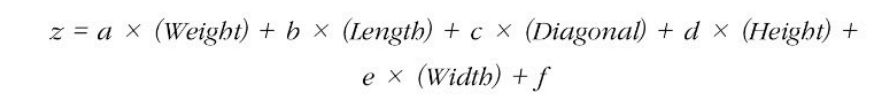
2. 시그모이드 함수 or 로지스틱 함수를 사용하여 z를 0~1 값으로 변환
- z가 아주 작은 음수일 때 0, z 가 아주 큰 양수일 때 1
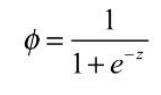

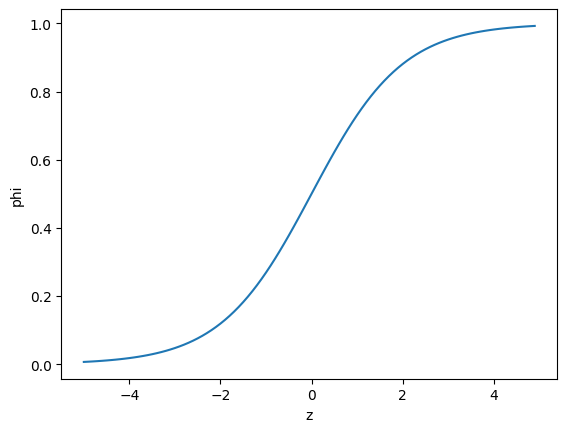

In [ ]:
#시그모이드 함수 그리기
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1/ (1 + np.exp(-z)) # 지수 함수 계산

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()


**로지스틱 회귀 - 이진 분류 모델**



불리언 인덱싱 : T/F 의 리스트를 인덱스로 전달하여 행 선택

In [ ]:
char_arr = np.array(['A','B', 'C', 'D', 'E'])
print(char_arr[[True,False,True,False,False]])

['A' 'C']


In [ ]:
#빙어와 도미에 대한 훈련셋 골라내기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


**predict_proba 메소드**
-  확률 계산
> 첫 번쨰 열 : 음성 클래스, 두 번쨰 열 : 양성 클래스


In [ ]:
print(lr.predict_proba(train_bream_smelt[:5])) #음성, 양성

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
print(lr.classes_)

['Bream' 'Smelt']


In [ ]:
#계수 확인 (양성 클래스)
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


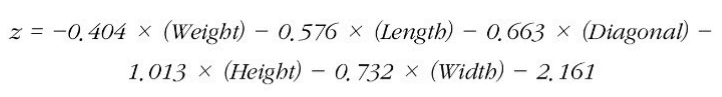

decision_function : 양성 클래스에 대한 z값 반환

In [ ]:
#z값 계산
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


**사이킷런의 LogisticRegression**

- 시그모이드 함수의 출력 > 0.5 -> 양성 클래스
- 시그모이드 함수의 출력 <= 0.5 -> 음성 클래스

In [ ]:
#시그모이드 함수에 통과(양성 클래스에 대한 확률 계산) - scipy
from scipy.special import expit
print(expit(decisions))


[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


**로지스틱 회귀 - 다중 클래스 분류 모델**

**LogisticRegression**
- 반복 알고리즘
> max_iter 매개변수로 반복횟수 조절 (default = 100)
- L2 규제 (계수의 제곱을 규제)
> C 매개변수로 규제정도 조절 (default = 1)
* alpha 와는 달리 C값 작을수록 규제 강함


In [ ]:
#훈련
lr = LogisticRegression(C=20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
#예측
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
#예측 확률 (5 sample X 7 classes)
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.classes_) # 예측 확률의 클래스 순서

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


**다중 클래스 분류 - 선형방정식**

- 클래스 마다 z값 하나씩 계산

In [ ]:
print(lr.coef_.shape, lr.intercept_.shape) #7개의 z값 계산

(7, 5) (7,)


**시그모이드 함수**

- z 를 0~1 사이로 반환(소프트맥스) + 전체 합이 1이 되도록 정규화
- 각 z 값을 e^x 에 통과시키고 그 합으로 나눠줌
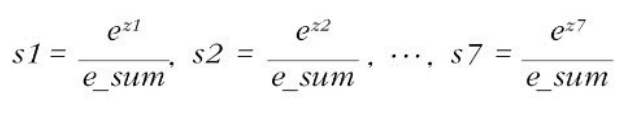

In [ ]:
#z 값 계산 (샘플 당 7개)
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
from scipy.special import softmax
proba = softmax(decision, axis = 1) # 각 행에 대해 연산 (좌-우) -> 각 행의 합 1
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


# 점진적 학습

이전에 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 학습하는 방법

- 상황 : 주마다 새로운 생선 데이터가 들어와서 이 데이터들을 추가적으로 학습해야함

>대안 1 : 들어올 때 마다 기존 데이터를 포함하여 다시 학습 -> 서버 한계

>대안 2 : 이전 데이터를 버림으로써 데이터 크기 유지 -> 중요한 데이터 손실 가능성



# 점진적 학습 알고리즘 - 확률적 경사 하강법

훈련세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금씩 내려가는 것을 반복하여 최종적으로 원하는 지점에 도달하는 방법

**에포크** : 훈련 세트를 한 번 모두 사용하는 과정

- 일반적으로 수십, 수백 번 이상의 에포크 수행

**미니배치 경사 하강법** : 샘플을 선택할 때 여러 개씩 경사 하강법 수행하는 방식

**배치 경사 하강법** : 한 번의 경사로 이동에서 전체 샘플을 사용하는 것
-> 전체 데이터로 방향을 정하기 때문에 안정적이나 컴퓨터 자원 많이 필요

경사 조금씩 내려가는 이유 -> 원하는 지점을 지나쳐 더 멀리 갈 수 있기 때문

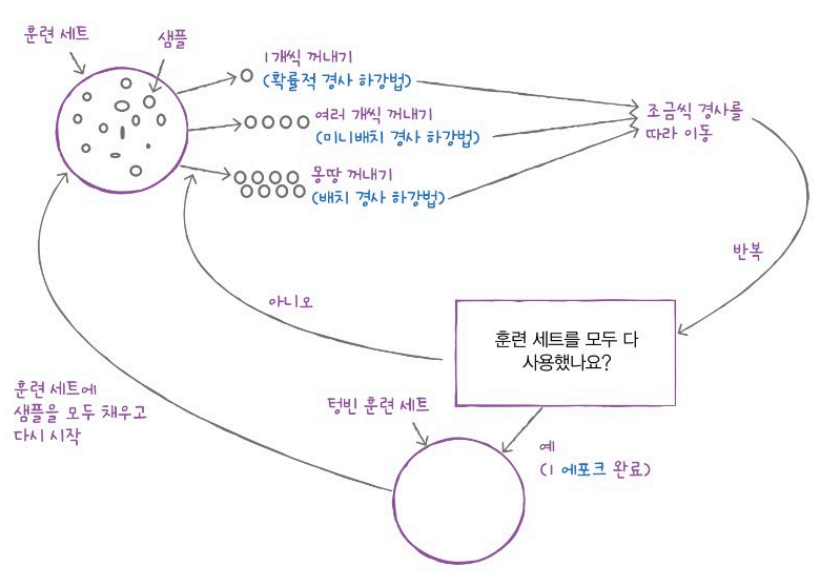

**분류에서의 손실 함수 정의**

- 정확도의 반대개념, 알고리즘의 손실 정도 표현

- 조건 : 미분 가능(연속적)해야 함


확률을 사용하지 않을 때의 문제점

>꺼내 온 샘플 중 맞힌 개수(정확도)에 음수를 취하여 손실함수로 사용한다면 0, 0.25, 0.5, 0.75, 1 과 같이 값이 이산적이고 듬성듬성 하여 조금씩 움직일 수 없다. -> 연속적인 개념 '확률' 도입

**확률을 함께 사용한 손실함수**


-------------------------------
확률 / 예측 / 정답

0.9 /   1    /   1

0.3 /   0    /   1

0.2 /   0    /   0

0.8/    1   /    0

----------------------
0.9 x 1 => -0.9 (정확도 높음, 손실 작음)

0.3 x 1 => -0.3 (정확도 낮음, 손실 큼)

0.2 -> 0.8 x 1 => -0.8 (정확도 높음, 손실 작음) (양성 클래스에 대한 예측으로 변환)

0.8 -> 0.2 x 1 => -0.2 (정확도 낮음, 손실 큼)

_________________________
**로지스틱 손실 함수**

예측확률에 로그함수 적용
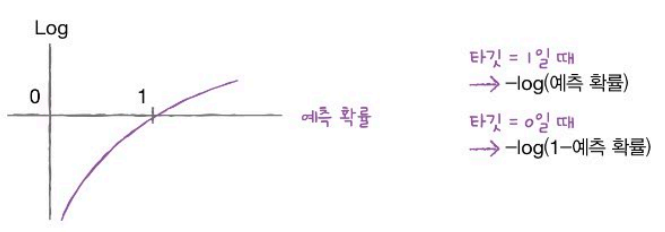

- 로그함수의 x값이 0~1 일때 음수가 되는데, 이 값에 음의 부호를 붙여 최종적으로 양수 값을 얻을 수 있음 -> 더 직관적으로 이해

- 0에 가까울 수록 손실 값이 아주 큰 음수가 되어 모델에 큰 영향을 줌

**이진분류와 다중 분류**

- 이진 분류 -> 로지스틱 손실 함수

- 다중 클래스 분류 -> 크로스엔트로피 손실 함수




In [ ]:
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')

fish_input = fish[['Weight', 'Length', 'Diagonal','Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

**SGD Classifier**

매개변수 loss = '(손실 함수 종류)'

매개변수 max_iter = (전체 훈련 세트의 반복횟수)

*모델 자체가 다중 클래스 분류라도 해당 클래스 1, 다른 나머지 클래스 0으로 두고 로지스틱 이용 가능(OvR)

In [ ]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log', max_iter = 10, random_state = 42) #로지스틱 손실 함수, 10회 반복
sc.fit(train_scaled, train_target) #샘플 1개씩 경사 하강법 단계 수행
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
# sc 추가 훈련 (점진적)
sc.partial_fit(train_scaled, train_target) # 1에포크씩 이어서 훈련
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


**에포크와 과대적합/과소적합**
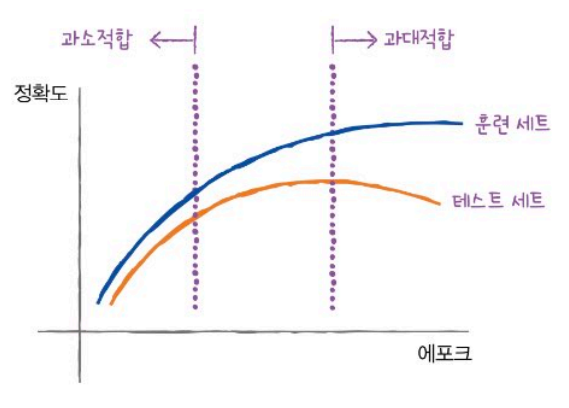

테스트 세트의 정확도가 감소하기 시작하는 시점(과대적합)에서 조기종료(early stopping) 하기


In [ ]:
#위 그래프 그리기
import numpy as np
sc = SGDClassifier(loss = 'log', random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target) # partial_fit() 메소드는 데이터 중 일부만 사용하여 전체 클래스를 모르기 때문에 classes 를 같이 넣어줌

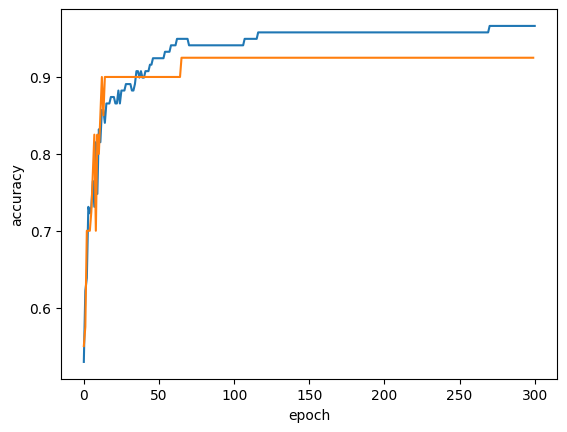

In [ ]:
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

100 번째 epoch 기준 train, test 벌어지고 있다.

In [ ]:
sc = SGDClassifier(loss = 'log', max_iter =100, tol = None, random_state = 42) #tol으로 향상될 최솟값 지정
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [ ]:
#힌지 손실 함수 이용
sc = SGDClassifier(loss = 'hinge', max_iter =100, tol = None, random_state = 42) #tol으로 향상될 최솟값 지정
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
